MSE: 15.7781


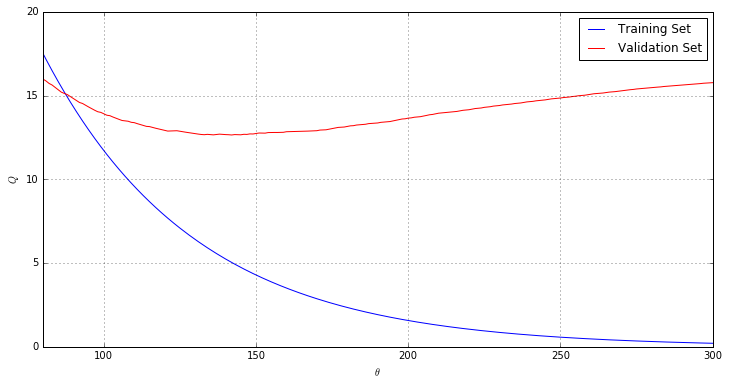

In [50]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

###############################################################################
# Load data
boston = datasets.load_boston()
X, y = shuffle(boston.data, boston.target, random_state=13)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

###############################################################################
# Fit regression model
params = {'n_estimators': 300, 'max_depth': 20, 'min_samples_split': 0.6,
          'subsample': 1, 'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

###############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.title('MSE')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Validation Set')
plt.legend(loc='upper right')
plt.xlim((80, 300))
plt.ylim((0, 20))
plt.xlabel(r'$\theta$')
plt.ylabel('$Q$')

###############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
# # plt.barh(pos, feature_importance[sorted_idx], align='center')
# plt.yticks(pos, boston.feature_names[sorted_idx])
# plt.xlabel('Relative Importance')
# plt.title('Variable Importance')
plt.grid(True)
plt.show()